## Reading STOFS-3D-Atlantic 3D Variables

This is per UNH's request for plotting and reading STOFS-3D variables.

In [1]:
import s3fs  # Importing the s3fs library for accessing S3 buckets
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xarray as xr

In [7]:
s3 = s3fs.S3FileSystem(anon=True)  # Enable anonymous access to the S3 bucket

field_path = "s3://noaa-nos-stofs3d-pds/STOFS-3D-Atl/stofs_3d_atl.20250505/stofs_3d_atl.t12z.field2d_f001_012.nc" # depths (2926236,)
salt_path = "s3://noaa-nos-stofs3d-pds/STOFS-3D-Atl/stofs_3d_atl.20250505/stofs_3d_atl.t12z.fields.salinity_f001_012.nc" # salinity (12, 2926236, 49) (time, horz grid point, vertical layer)
temp_path = "s3://noaa-nos-stofs3d-pds/STOFS-3D-Atl/stofs_3d_atl.20250505/stofs_3d_atl.t12z.fields.temperature_f001_012.nc" # temperature (12, 2926236, 49) (time, horz grid point, vertical layer)
z_path = "s3://noaa-nos-stofs3d-pds/STOFS-3D-Atl/stofs_3d_atl.20250505/stofs_3d_atl.t12z.fields.zCoordinates_f037_048.nc" # z corrdinates of depths (12, 2926236, 49) (time, horz grid point, vertical layer)


In [8]:
field_ds = xr.open_dataset(s3.open(field_path, 'rb'))
field_ds

<xarray.Dataset> Size: 3GB
Dimensions:                  (time: 12, nSCHISM_hgrid_node: 2926236,
                              nSCHISM_hgrid_face: 5548650,
                              nMaxSCHISM_hgrid_face_nodes: 3)
Coordinates:
  * time                     (time) datetime64[ns] 96B 2025-05-05T13:00:00 .....
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_hgrid_face,
                                nMaxSCHISM_hgrid_face_nodes
Data variables: (12/15)
    SCHISM_hgrid_node_x      (nSCHISM_hgrid_node) float64 23MB ...
    SCHISM_hgrid_node_y      (nSCHISM_hgrid_node) float64 23MB ...
    SCHISM_hgrid_face_nodes  (nSCHISM_hgrid_face, nMaxSCHISM_hgrid_face_nodes) int32 67MB ...
    depth                    (nSCHISM_hgrid_node) float32 12MB ...
    elev                     (time, nSCHISM_hgrid_node) float64 281MB ...
    temp_surface             (time, nSCHISM_hgrid_node) float64 281MB ...
    ...                       ...
    uvel_surface             (time, nSCHISM_hgrid_node) float64 281MB ...
    vvel_surface             (time, nSCHISM_hgrid_node) float64 281MB ...
    uvel_bottom              (time, nSCHISM_hgrid_node) float64 281MB ...
    vvel_bottom              (time, nSCHISM_hgrid_node) float64 281MB ...
    uvel4.5                  (time, nSCHISM_hgrid_node) float64 281MB ...
    vvel4.5                  (time, nSCHISM_hgrid_node) float64 281MB ...
Attributes:
    title:       SCHISM Model output
    source:      SCHISM model output version v10
    references:  http://ccrm.vims.edu/schismweb/
    history:     Mon May  5 18:27:20 2025: ncatted -a long_name,elev,o,c,wate...
    NCO:         netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net...

In [9]:
z_ds = xr.open_dataset(s3.open(z_path, 'rb'))
z_ds

<xarray.Dataset> Size: 7GB
Dimensions:       (time: 12, nSCHISM_hgrid_node: 2926236,
                   nSCHISM_vgrid_layers: 49)
Coordinates:
  * time          (time) datetime64[ns] 96B 2025-05-07T01:00:00 ... 2025-05-0...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    zCoordinates  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 7GB ...
Attributes:
    NCO:      netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net, C...
    history:  Mon May  5 18:07:07 2025: ncatted -a units,zCoordinates,o,c,m -...

In [ ]:
field_ds.depth.min(dim='nSCHISM_hgrid_node')

In [10]:
temp_ds = xr.open_dataset(s3.open(temp_path, 'rb'))
temp_ds

<xarray.Dataset> Size: 7GB
Dimensions:      (time: 12, nSCHISM_hgrid_node: 2926236,
                  nSCHISM_vgrid_layers: 49)
Coordinates:
  * time         (time) datetime64[ns] 96B 2025-05-05T13:00:00 ... 2025-05-06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    temperature  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 7GB ...
Attributes:
    NCO:      netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net, C...
    history:  Mon May  5 18:07:07 2025: ncatted -a units,temperature,o,c,Degr...

In [11]:
salt_ds = xr.open_dataset(s3.open(salt_path, 'rb'))
salt_ds

<xarray.Dataset> Size: 7GB
Dimensions:   (time: 12, nSCHISM_hgrid_node: 2926236, nSCHISM_vgrid_layers: 49)
Coordinates:
  * time      (time) datetime64[ns] 96B 2025-05-05T13:00:00 ... 2025-05-06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 7GB ...
Attributes:
    NCO:      netCDF Operators version 4.9.7 (Homepage = http://nco.sf.net, C...
    history:  Mon May  5 18:07:07 2025: ncatted -a units,salinity,o,c,PSU -a ...

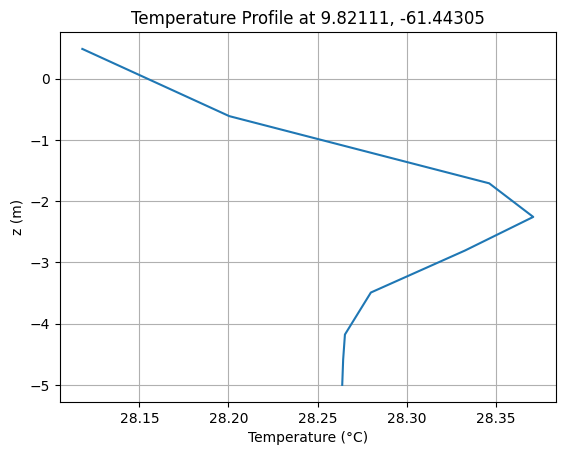

In [21]:
# get each variable array out of file

t = 1 # random time
i = 5000 # random index

# extract temps at random index and time
temp = temp_ds.temperature[t,i,:].values  
z = z_ds.zCoordinates[t,i,:].values  
salt = salt_ds.salinity[t,i,:].values   
lat = field_ds.SCHISM_hgrid_node_y[i].values   
lon = field_ds.SCHISM_hgrid_node_x[i].values  

# plot temp profile against depth profile
plt.figure()
plt.plot(temp, z)
# plt.gca().invert_yaxis()
plt.title(f'Temperature Profile at {lat:.5f}, {lon:.5f}')
plt.xlabel('Temperature (°C)')
plt.ylabel('z (m)')
plt.grid(True)

ax = plt.gca()
# get rid of scientific notation on y axis so i can see how wrong my values are in meters
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()

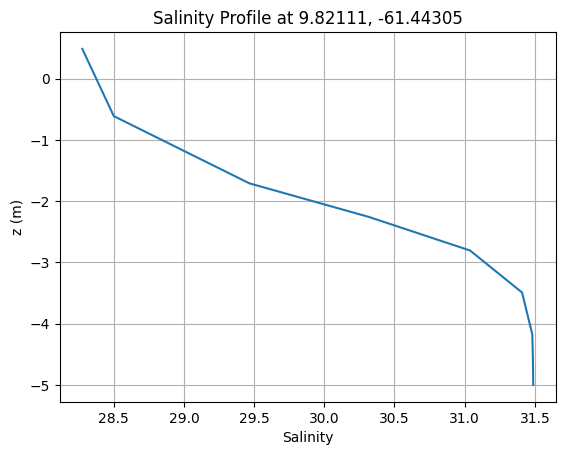

In [23]:
# plot salinity profile against depth profile
plt.figure()
plt.plot(salt, z)
# plt.gca().invert_yaxis()
plt.title(f'Salinity Profile at {lat:.5f}, {lon:.5f}')
plt.xlabel('Salinity')
plt.ylabel('z (m)')
plt.grid(True)

ax = plt.gca()
# get rid of scientific notation on y axis so i can see how wrong my values are in meters
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.show()